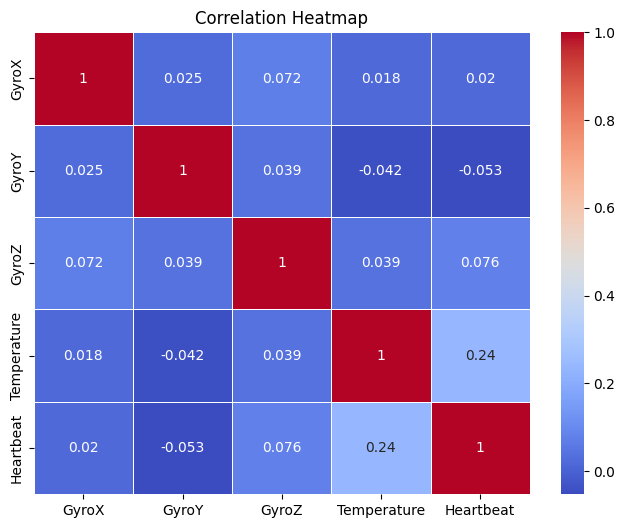

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# 데이터 로드
data_path = '/content/adl_fall_all.csv'
data = pd.read_csv(data_path)

# 변수 선택
variables = ['GyroX', 'GyroY', 'GyroZ', 'Temperature', 'Heartbeat']

# 데이터 상관관계 분석
correlation = data[variables].corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


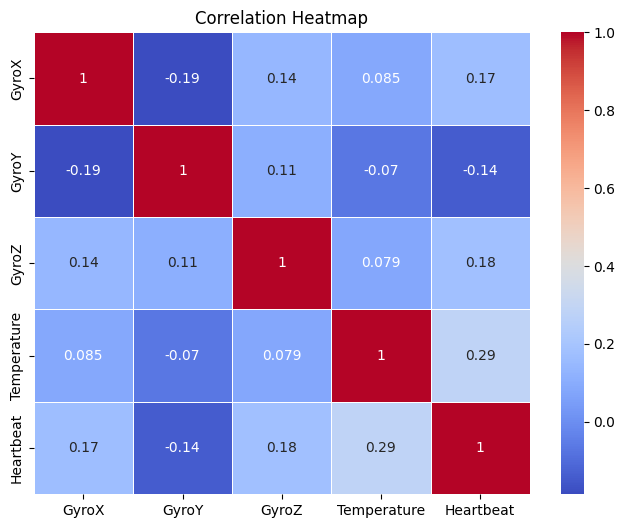

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로드
data_path = '/content/adl_fall_all.csv'
data = pd.read_csv(data_path)

# UserCode가 33인 데이터만 선택하여 data_33에 저장
data_33 = data[data['UserCode'] == 33]

# 변수 선택
variables = ['GyroX', 'GyroY', 'GyroZ', 'Temperature', 'Heartbeat']

# 데이터 상관관계 분석
correlation = data_33[variables].corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


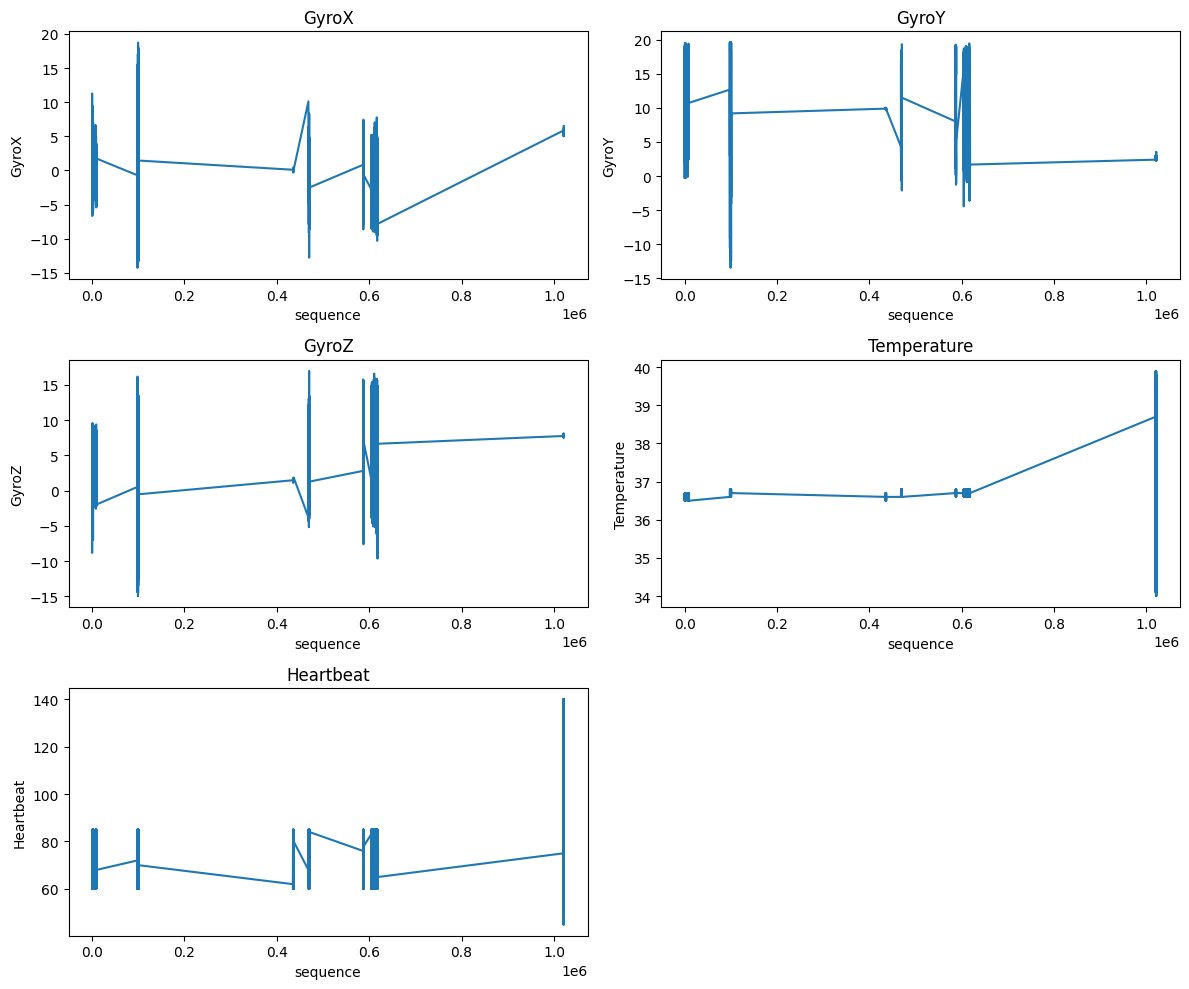

In [10]:
# 변수별 그래프 그리기
plt.figure(figsize=(12, 10))
for i, var in enumerate(variables):
    plt.subplot(3, 2, i+1)
    sns.lineplot(data=data_33, x='No', y=var)
    plt.title(var)
    plt.xlabel('sequence')
    plt.ylabel(var)
plt.tight_layout()
plt.show()


In [3]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=5, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['UserCode'], data['No'], data['GyroX'], 'X-Axis')
    plot_axis(ax1, data['UserCode'], data['No'], data['GyroY'], 'Y-Axis')
    plot_axis(ax2, data['UserCode'], data['No'], data['GyroZ'], 'Z-Axis')
    plot_axis(ax3, data['UserCode'], data['No'], data['Temperature'], 'Temperature')
    plot_axis(ax4, data['UserCode'], data['No'], data['Heartbeat'], 'Heartbeat')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, user, x, y, title):
  for i in range(len(x)-1):
    ax.plot([x.iloc[i], x.iloc[i+1]],[y.iloc[i], y.iloc[i+1]], color=u2c[user.iloc[i]])
  ax.set_title(title)
  ax.xaxis.set_visible(False)
  ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
  ax.set_xlim([min(x), max(x)])
  ax.grid(True)

In [11]:
from itertools import cycle

users = data_33['UserCode'].value_counts().index
colors = 'bckgmwry'
u2c = {k:v for (k, v) in zip(users, cycle(colors))}
u2c

{33: 'b'}

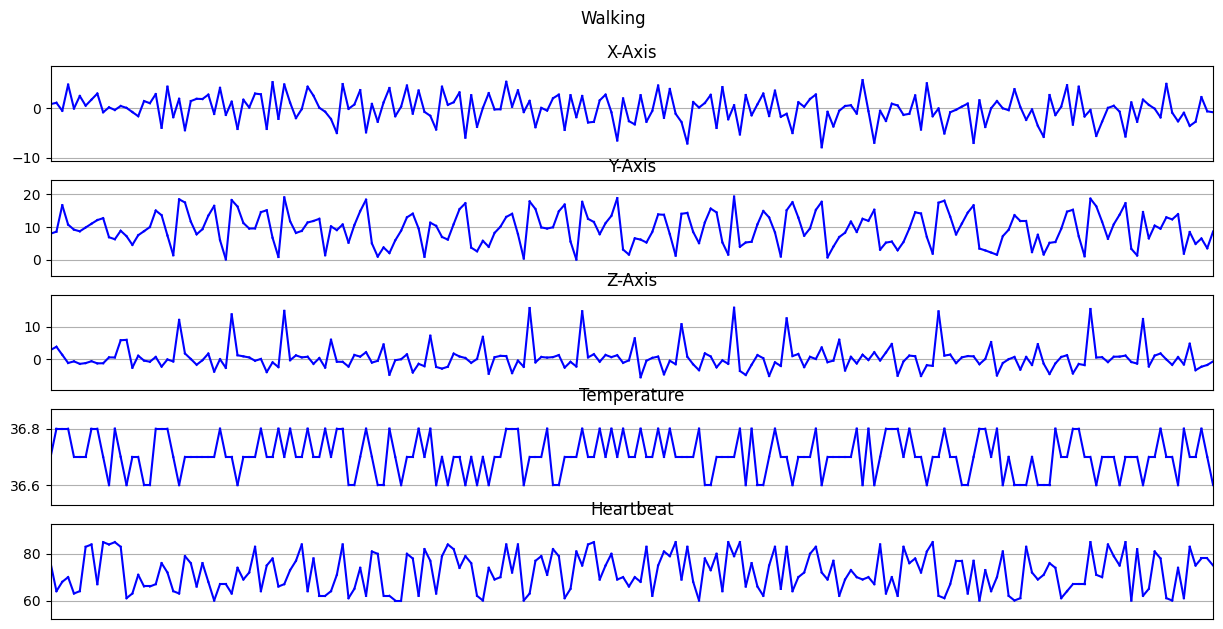

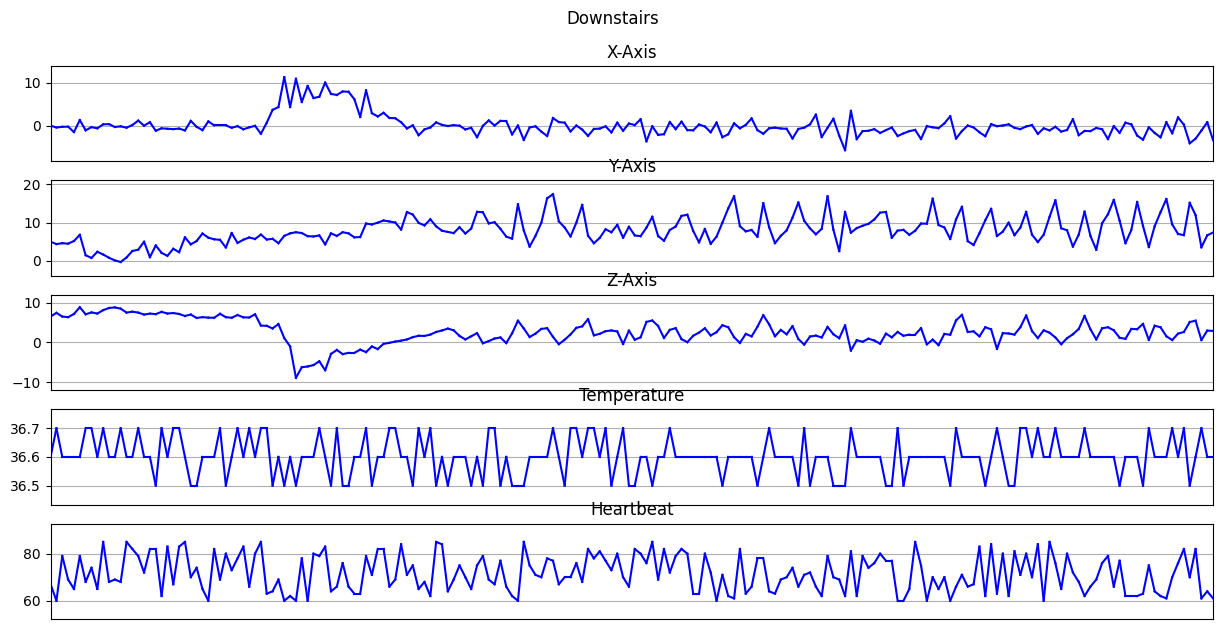

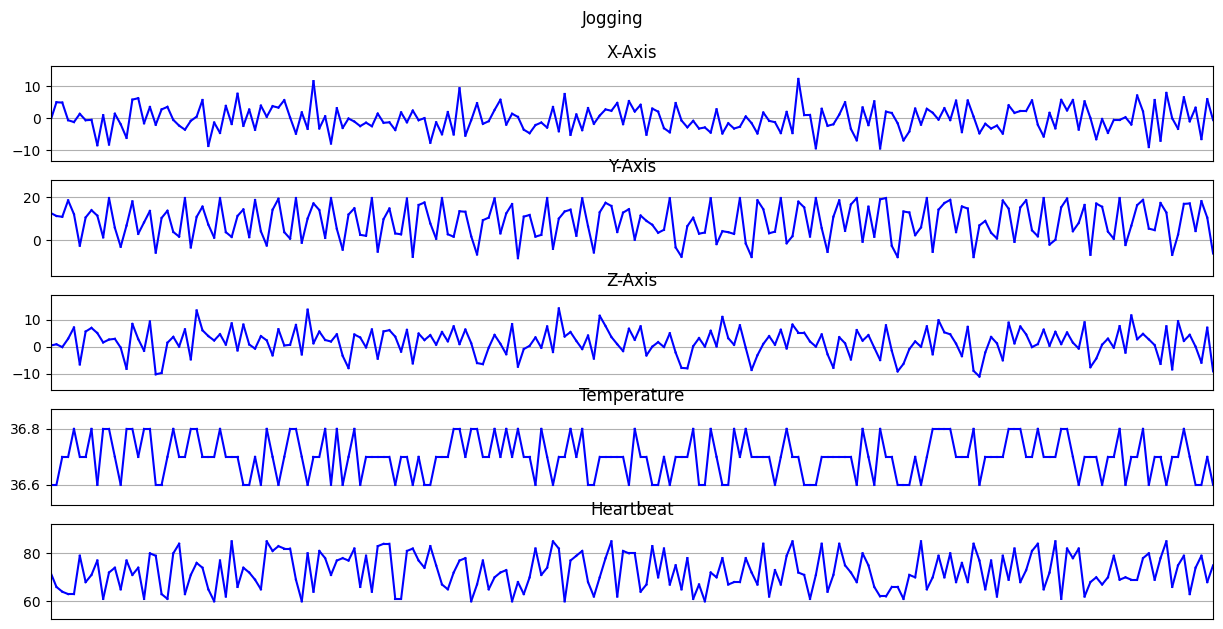

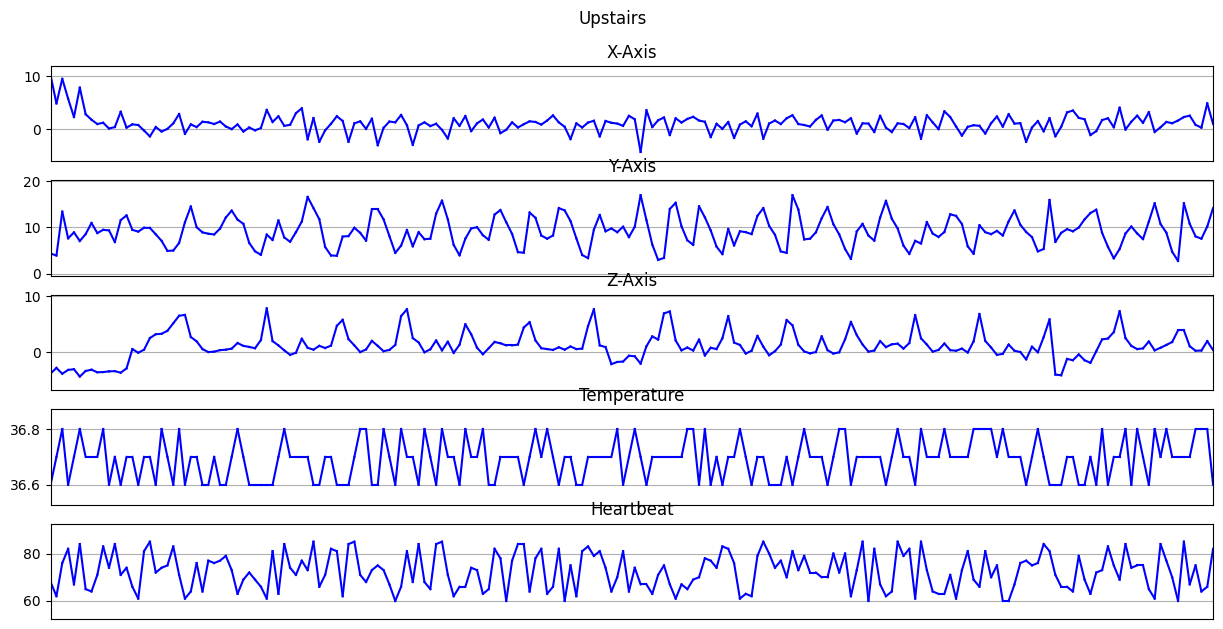

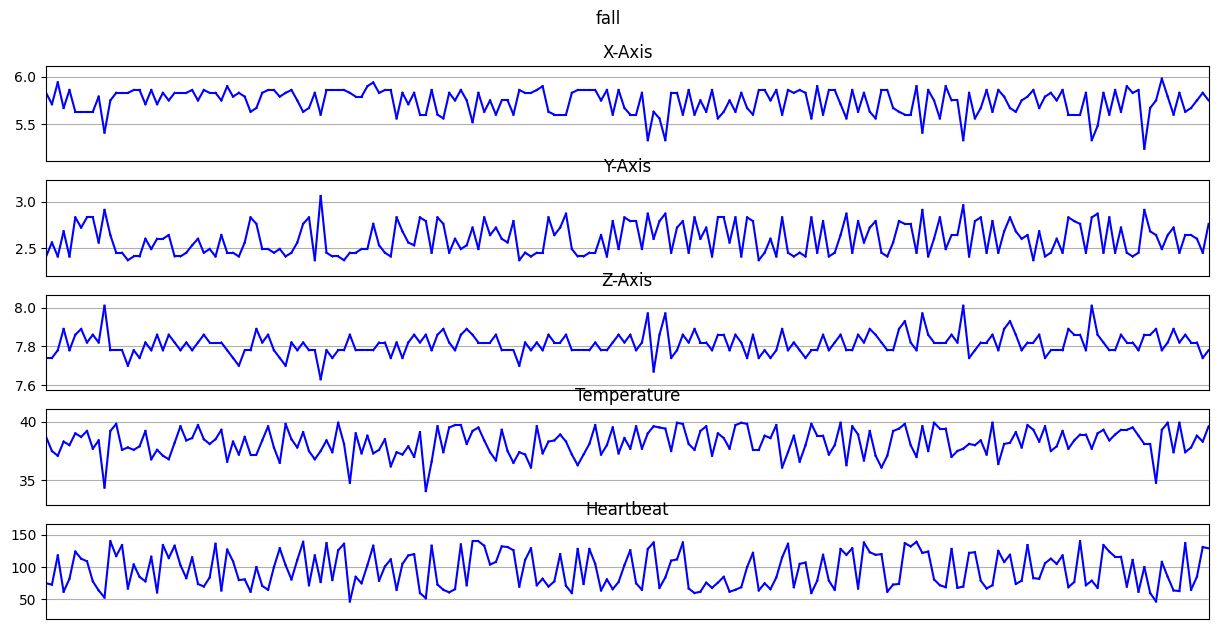

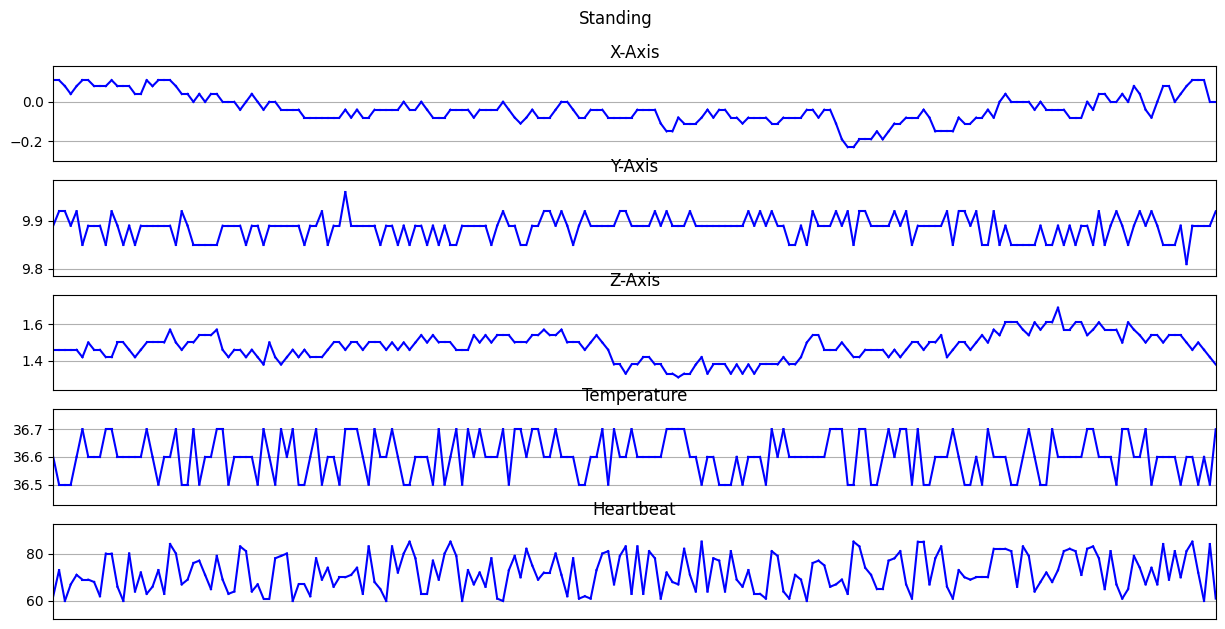

In [12]:
for activity in data_33['Label'].value_counts().index:
    mask = (data_33['Label'] == activity)
    data_for_plot = data_33[mask][:200]
    plot_activity(activity, data_for_plot)

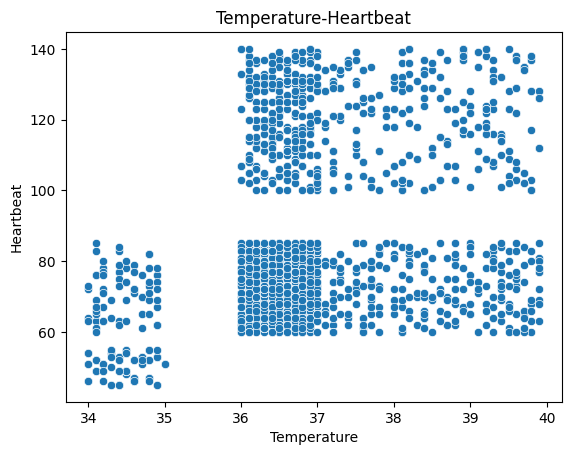

In [13]:
import seaborn as sns

sns.scatterplot(data=data_33, x='Temperature', y='Heartbeat')
plt.xlabel('Temperature')
plt.ylabel('Heartbeat')
plt.title('Temperature-Heartbeat')
plt.show()


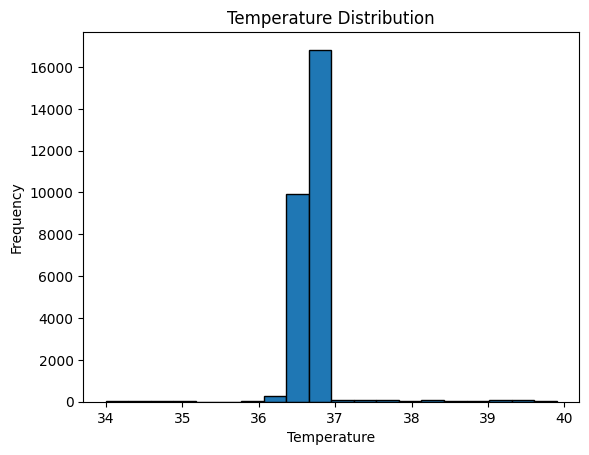

In [19]:
plt.hist(data_33['Temperature'], bins=20, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()


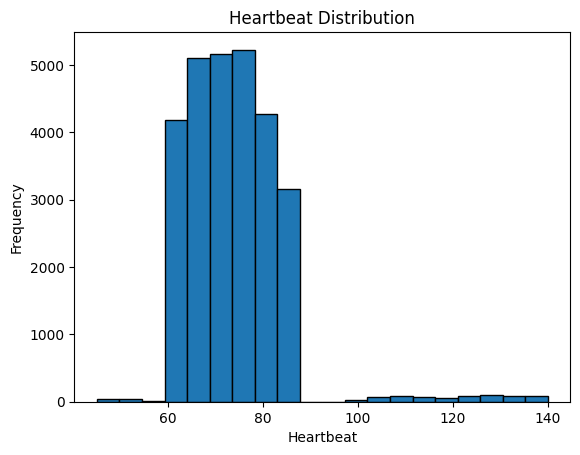

In [15]:
plt.hist(data_33['Heartbeat'], bins=20, edgecolor='black')
plt.xlabel('Heartbeat')
plt.ylabel('Frequency')
plt.title('Heartbeat Distribution')
plt.show()


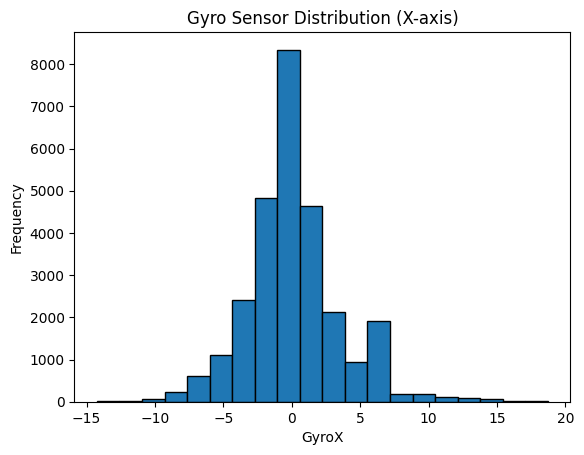

In [16]:
plt.hist(data_33['GyroX'], bins=20, edgecolor='black')
plt.xlabel('GyroX')
plt.ylabel('Frequency')
plt.title('Gyro Sensor Distribution (X-axis)')
plt.show()


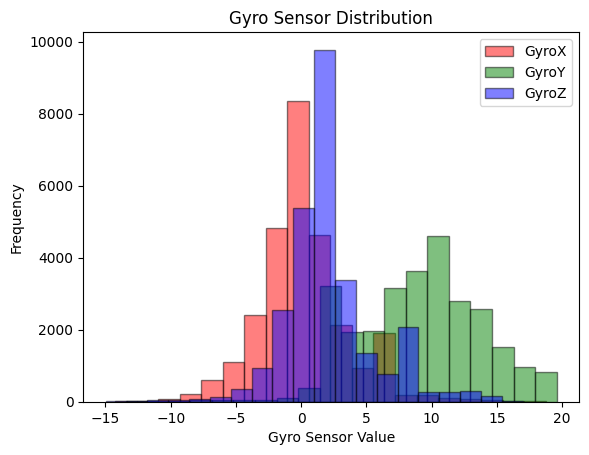

In [17]:
plt.hist(data_33['GyroX'], bins=20, edgecolor='black', color='red', alpha=0.5, label='GyroX')
plt.hist(data_33['GyroY'], bins=20, edgecolor='black', color='green', alpha=0.5, label='GyroY')
plt.hist(data_33['GyroZ'], bins=20, edgecolor='black', color='blue', alpha=0.5, label='GyroZ')
plt.xlabel('Gyro Sensor Value')
plt.ylabel('Frequency')
plt.title('Gyro Sensor Distribution')
plt.legend()
plt.show()


In [20]:
correlation = data['Temperature'].corr(data['Heartbeat'])
print("Correlation between Temperature and Heartbeat:", correlation)


Correlation between Temperature and Heartbeat: 0.23851484456279262


In [21]:
std_dev_x = data['GyroX'].std()
std_dev_y = data['GyroY'].std()
std_dev_z = data['GyroZ'].std()

print("Standard Deviation (GyroX):", std_dev_x)
print("Standard Deviation (GyroY):", std_dev_y)
print("Standard Deviation (GyroZ):", std_dev_z)


Standard Deviation (GyroX): 6.7785730680473355
Standard Deviation (GyroY): 6.716469781707566
Standard Deviation (GyroZ): 4.704353815812535


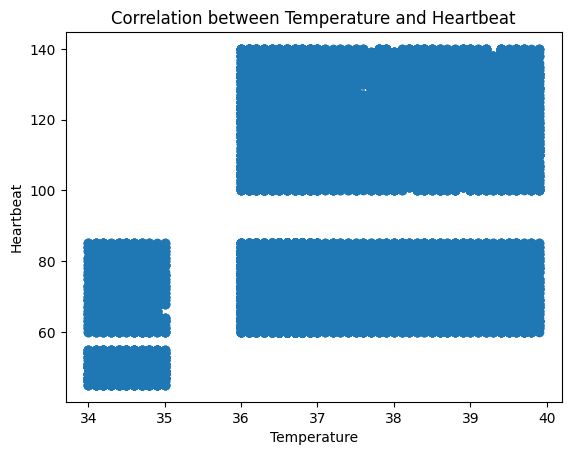

In [23]:
import matplotlib.pyplot as plt

plt.scatter(data['Temperature'], data['Heartbeat'])
plt.xlabel('Temperature')
plt.ylabel('Heartbeat')
plt.title('Correlation between Temperature and Heartbeat')
plt.show()


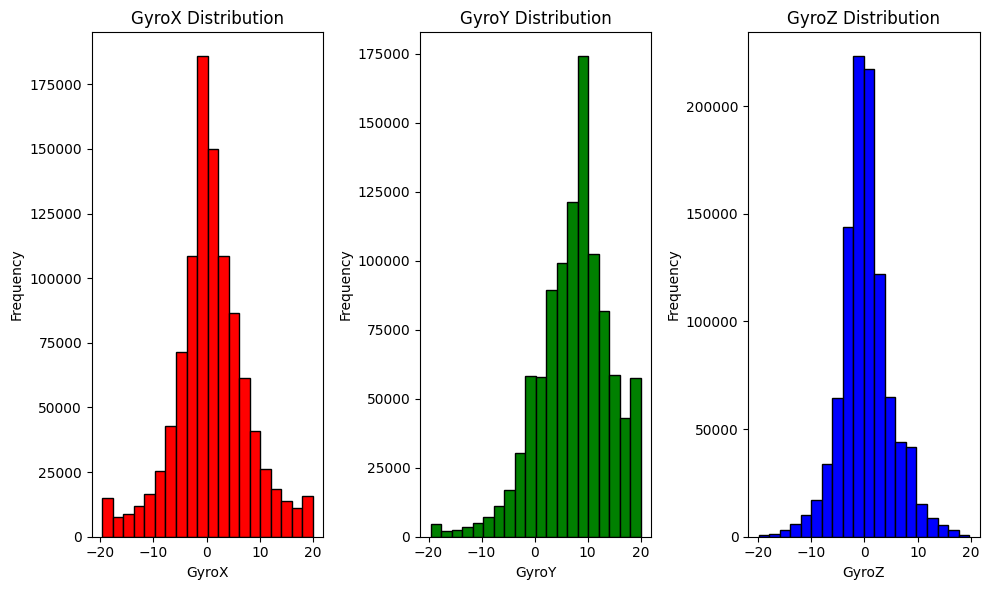

In [24]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.hist(data['GyroX'], bins=20, edgecolor='black', color='red')
plt.xlabel('GyroX')
plt.ylabel('Frequency')
plt.title('GyroX Distribution')

plt.subplot(1, 3, 2)
plt.hist(data['GyroY'], bins=20, edgecolor='black', color='green')
plt.xlabel('GyroY')
plt.ylabel('Frequency')
plt.title('GyroY Distribution')

plt.subplot(1, 3, 3)
plt.hist(data['GyroZ'], bins=20, edgecolor='black', color='blue')
plt.xlabel('GyroZ')
plt.ylabel('Frequency')
plt.title('GyroZ Distribution')

plt.tight_layout()
plt.show()
